# Investigate Business Hotel using Data Visualization
Our focus is to find out how our customers behave in making hotel reservations, and its relationship to the rate of cancellation of hotel reservations

## Task 1 Data Preprocessing

### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset/hotel_bookings_data.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Handling Missing Values

In [24]:
# copy dataframe before preprocessing
dfs = df.copy()

# show missing values
missing_vals = dfs.isna().sum()
missing_vals = missing_vals[missing_vals > 0]
missing_vals

children         4
city           488
agent        16340
company     112593
dtype: int64

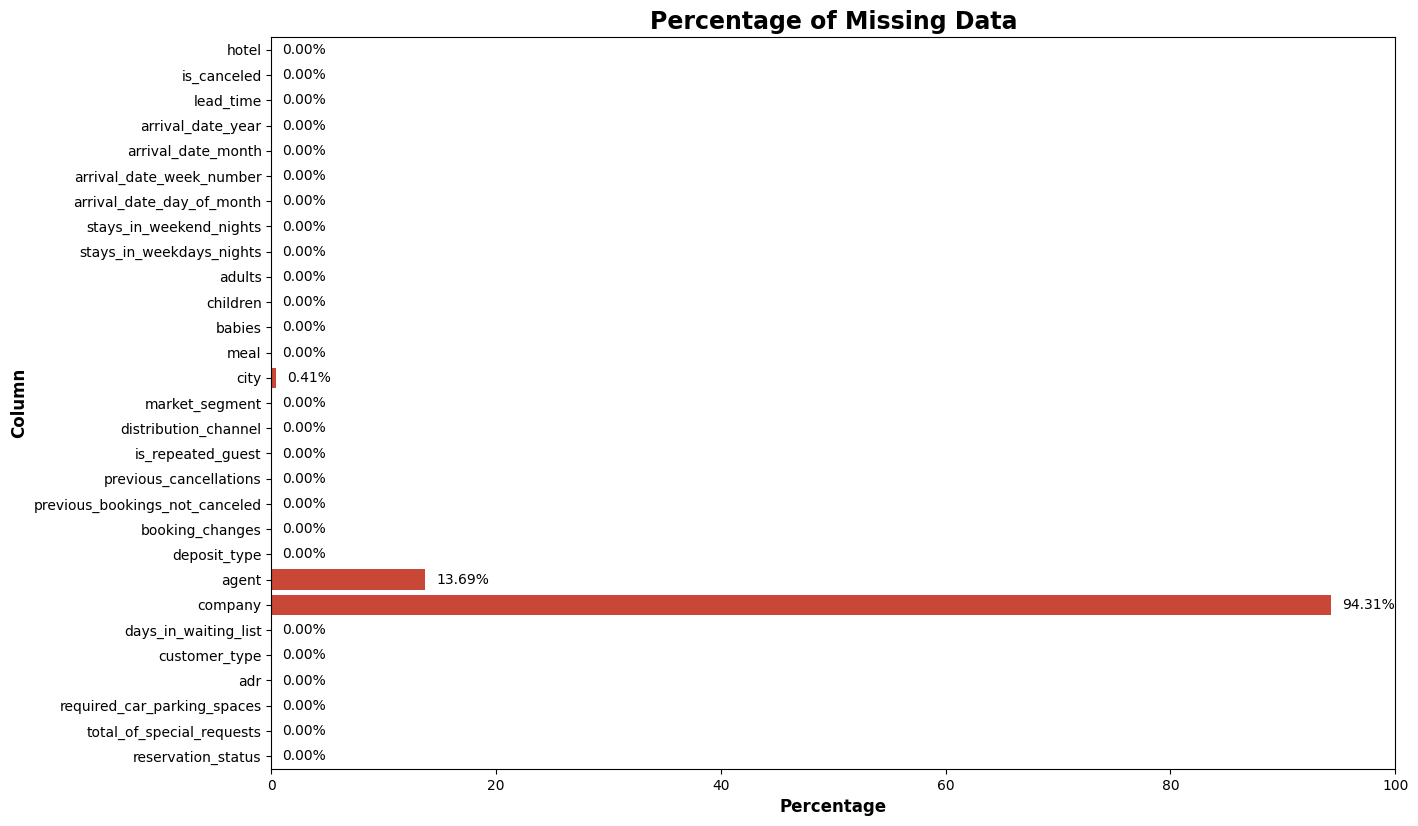

In [25]:
missing = dfs.isnull().sum()*100 / len(dfs)

percentage_missing = pd.DataFrame({'column':df.columns,
                                   'missing_percentage %':missing.values})
percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
percentage_missig = percentage_missing.sort_values('missing_percentage %', ascending=False)
percentage_missing = percentage_missing.reset_index()
percentage_missing = percentage_missing.drop('index', axis=1)

plt.figure(figsize=(14.5,9.5))
ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
for p in ax.patches:
    ax.annotate('%.2f' % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(8,0), textcoords='offset points', ha='left', va='center', fontsize=10)
plt.title('Percentage of Missing Data', fontsize=17, fontweight='bold')
plt.ylabel('Column', fontsize=12, fontweight='bold')
plt.xlabel('Percentage', fontsize=12, fontweight='bold')
plt.xlim(0,100)
plt.show()

C:\Users\azary\AppData\Local\Temp\ipykernel_19004\458146095.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dfs.agent, shade=True)


Text(0.5, 1.0, 'KDEplot of Agent Price')

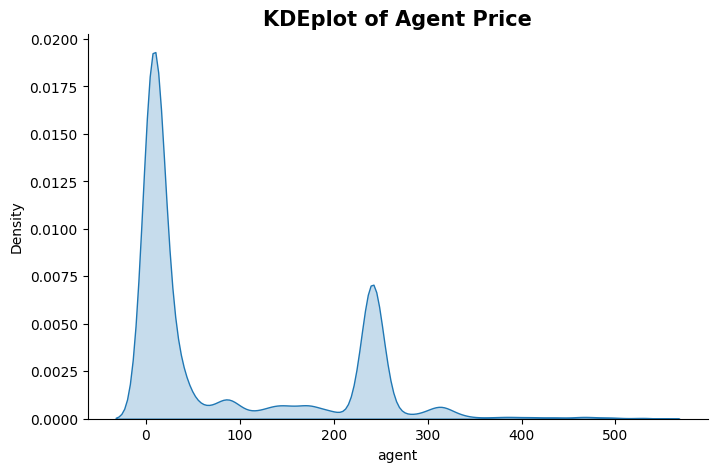

In [26]:
plt.figure(figsize=(8,5))
sns.kdeplot(dfs.agent, shade=True)
sns.despine()
plt.title('KDEplot of Agent Price', fontsize=15, fontweight='bold')

In [27]:
# impute missing values
dfs['agent'].fillna(dfs['agent'].median(), inplace=True)
dfs['children'].fillna(dfs['children'].mode()[0], inplace=True)
dfs['city'].fillna(dfs['city'].mode()[0], inplace=True)

# drop missing values
dfs.drop(columns=['company'], inplace=True)

C:\Users\azary\AppData\Local\Temp\ipykernel_19004\3365446194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs['agent'].fillna(dfs['agent'].median(), inplace=True)
C:\Users\azary\AppData\Local\Temp\ipykernel_19004\3365446194.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


## Replace Inconvenient Values

In [28]:
for column in df.columns:
    print('column:', column)
    print(df[column].value_counts())
    print('\n')

column: hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64


column: is_canceled
is_canceled
0    75166
1    44224
Name: count, dtype: int64


column: lead_time
lead_time
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: count, Length: 479, dtype: int64


column: arrival_date_year
arrival_date_year
2018    56707
2019    40687
2017    21996
Name: count, dtype: int64


column: arrival_date_month
arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: count, dtype: int64


column: arrival_date_week_number
arrival_date_week_number
33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    26

column with inconvenient value:
- meal
- market_segment
- distribution_channel


In [29]:
dfs['meal'] = dfs['meal'].replace('Undefined', 'Other')
dfs['market_segment'].replace('Undefined', 'Online TA', inplace=True)
dfs['distribution_channel'].replace('Undefined', 'TA/TO', inplace=True)


C:\Users\azary\AppData\Local\Temp\ipykernel_19004\1303668045.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs['market_segment'].replace('Undefined', 'Online TA', inplace=True)
C:\Users\azary\AppData\Local\Temp\ipykernel_19004\1303668045.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

## Drop unnecessary data

In [30]:
dfs['sum_guests'] = dfs['adults'] + dfs['children'] + dfs['babies']
dfs_guest = dfs.loc[dfs['sum_guests'] > 0]
dfs_guest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal                 

# Task 2 : Monthly Hotel Booking Analysis Based On Hotel Type

### Create an aggregate table that shows the comparison of the number of hotel bookings each month based on hotel type

In [31]:
dfx = dfs_guest.copy()

booking_counts = dfx.groupby(['hotel', 'arrival_date_year', 'arrival_date_month'])['hotel'].count().rename("count_booking").reset_index()

booking_counts

,hotel,arrival_date_year,arrival_date_month,count_booking
0,City Hotel,2017,December,3382
1,City Hotel,2017,February,1649
2,City Hotel,2017,January,1233
3,City Hotel,2017,November,3524
4,City Hotel,2017,October,2474
5,City Hotel,2017,September,1396
6,City Hotel,2018,April,2365
7,City Hotel,2018,August,3921
8,City Hotel,2018,December,4212
9,City Hotel,2018,February,2465


### Order the data based on month

In [32]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

booking_counts['arrival_date_month'] = pd.Categorical(booking_counts['arrival_date_month'], categories=months_order, ordered=True)

booking_counts = booking_counts.sort_values(['arrival_date_year', 'arrival_date_month'])

booking_counts

,hotel,arrival_date_year,arrival_date_month,count_booking
2,City Hotel,2017,January,1233
28,Resort Hotel,2017,January,1104
1,City Hotel,2017,February,1649
27,Resort Hotel,2017,February,1264
5,City Hotel,2017,September,1396
31,Resort Hotel,2017,September,1378
4,City Hotel,2017,October,2474
30,Resort Hotel,2017,October,1409
3,City Hotel,2017,November,3524
29,Resort Hotel,2017,November,1585


### Normalized the data

In [33]:
# Create a DataFrame with all combinations of 'hotel', 'arrival_date_year', and 'arrival_date_month'
all_combinations = pd.MultiIndex.from_product([
    booking_counts['hotel'].unique(),
    booking_counts['arrival_date_year'].unique(),
    months_order
], names=['hotel', 'arrival_date_year', 'arrival_date_month']).to_frame(index=False)

# Merge the new DataFrame with the original DataFrame
booking_counts_normalized = pd.merge(all_combinations, booking_counts, how='left', on=['hotel', 'arrival_date_year', 'arrival_date_month'])

# Calculate the divided count for each hotel and month in 2018
divided_counts = booking_counts[(booking_counts['arrival_date_year'] == 2018)][['hotel', 'arrival_date_month', 'count_booking']].copy()
divided_counts['count_booking'] /= 3
divided_counts.set_index(['hotel', 'arrival_date_month'], inplace=True)

# Use the divided counts to fill the missing values in 2017 and 2019
for year in [2017, 2019]:
    for month in months_order:
        for hotel in booking_counts['hotel'].unique():
            mask = (booking_counts_normalized['hotel'] == hotel) & (booking_counts_normalized['arrival_date_year'] == year) & (booking_counts_normalized['arrival_date_month'] == month)
            booking_counts_normalized.loc[mask, 'count_booking'] = booking_counts_normalized.loc[mask, 'count_booking'].fillna(divided_counts.loc[(hotel, month), 'count_booking'])

booking_counts_normalized

,hotel,arrival_date_year,arrival_date_month,count_booking
0,City Hotel,2017,January,1233.000000
1,City Hotel,2017,February,1649.000000
2,City Hotel,2017,March,454.666667
3,City Hotel,2017,April,788.333333
4,City Hotel,2017,May,1013.666667
...,...,...,...,...
67,Resort Hotel,2019,August,1675.000000
68,Resort Hotel,2019,September,1754.000000
69,Resort Hotel,2019,October,1800.000000
70,Resort Hotel,2019,November,507.666667


In [34]:
# Sum all booking counts per year
booking_counts_sum = booking_counts_normalized.groupby(['hotel', 'arrival_date_month'])['count_booking'].sum().reset_index()

# sort values (again)
booking_counts_sum['arrival_date_month'] = pd.Categorical(booking_counts_sum['arrival_date_month'], categories=months_order, ordered=True)

booking_counts_sum = booking_counts_sum.sort_values(['arrival_date_month'])

booking_counts_sum

,hotel,arrival_date_month,count_booking
4,City Hotel,January,5370.333333
16,Resort Hotel,January,2878.666667
3,City Hotel,February,4935.666667
15,Resort Hotel,February,3105.333333
7,City Hotel,March,4184.666667
19,Resort Hotel,March,2485.666667
0,City Hotel,April,5738.333333
12,Resort Hotel,April,3608.333333
20,Resort Hotel,May,3926.666667
8,City Hotel,May,7447.666667


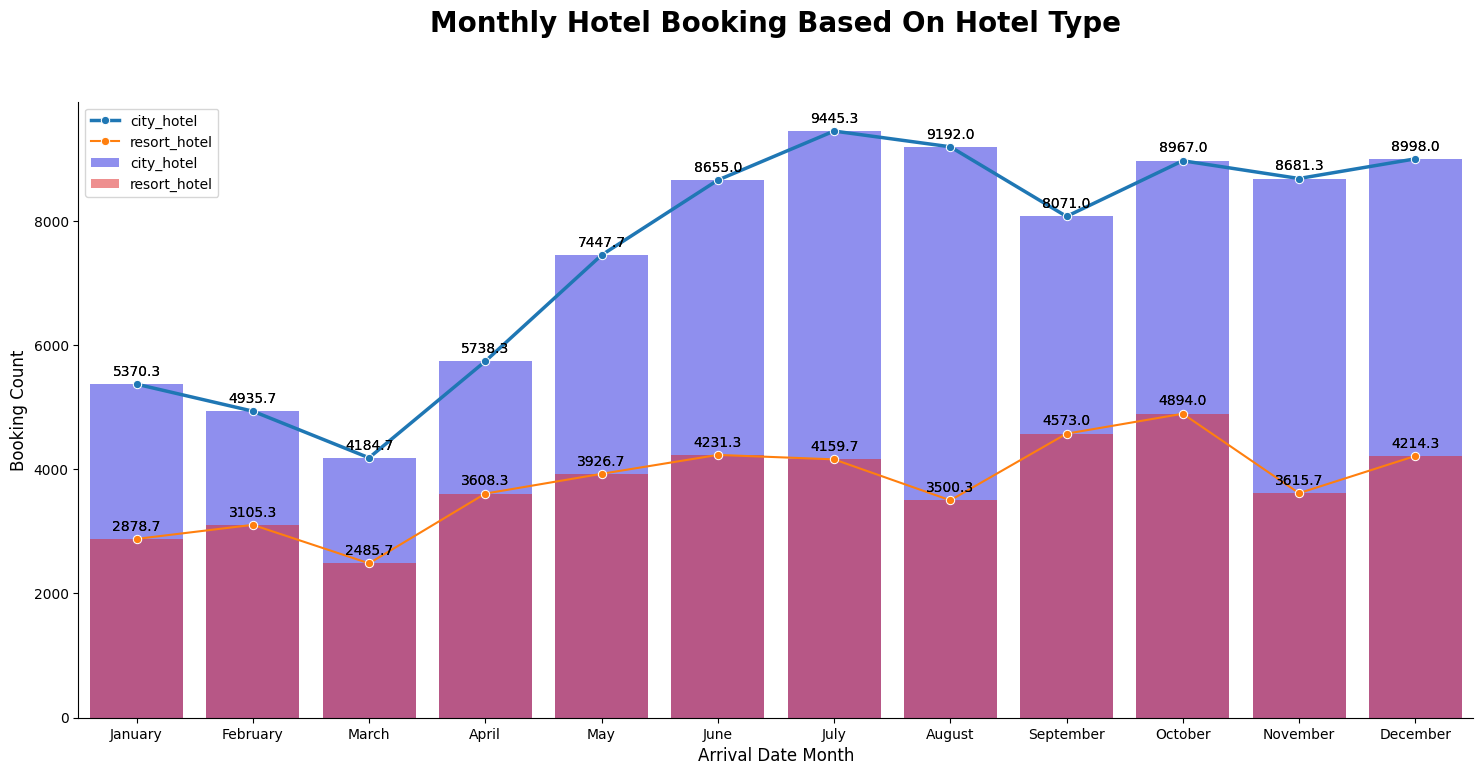

In [35]:
# Seperate the city_hotel data and resort_hotel data
city_hotel = booking_counts_sum.loc[booking_counts_sum.hotel=='City Hotel']
resort_hotel = booking_counts_sum.loc[booking_counts_sum.hotel=='Resort Hotel']

# plot the data with line plot from seaborn
plt.figure(figsize=(18,8))

# lineplot for city_hotel
sns.lineplot(x='arrival_date_month', y='count_booking', data=city_hotel, marker='o', label='city_hotel', linewidth=2.5)

# lineplot for resort_hotel
sns.lineplot(x='arrival_date_month', y='count_booking', data=resort_hotel, marker='o', label='resort_hotel')

# barplot for city_hotel
city_bar = sns.barplot(x='arrival_date_month', y='count_booking', data=city_hotel, label='city_hotel', color='b', alpha=0.5)

# barplot for resort_hotel
resort_bar = sns.barplot(x='arrival_date_month', y='count_booking', data=resort_hotel, label='resort_hotel', color='r', alpha=0.5)

sns.despine()

plt.legend()
plt.title('Monthly Hotel Booking Based On Hotel Type', fontsize=20, fontweight='bold', y=1.1)
plt.xlabel('Arrival Date Month', fontsize=12)
plt.ylabel('Booking Count', fontsize=12)

# Add number annotations
for p in city_bar.patches:
    city_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

for p in resort_bar.patches:
    resort_bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.show()

### Task 3 Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

### Create a new column contains stay in duration

In [36]:
dfx['stay_in_duration'] = dfx['stays_in_weekdays_nights'] + dfx['stays_in_weekend_nights']

### Group the values from stay in duration column

In [37]:
dfx.stay_in_duration.value_counts()

stay_in_duration
2     27632
3     27064
1     21005
4     17373
7      8648
5      7771
6      3846
8      1155
10     1135
14      913
9       840
0       645
11      393
12      220
13      141
15       72
21       71
16       40
25       37
18       35
28       34
19       22
17       20
20       14
22       13
29       13
30       13
23        8
26        6
24        6
35        5
42        4
27        4
33        3
56        2
38        1
48        1
46        1
45        1
69        1
60        1
34        1
Name: count, dtype: int64

In [38]:
duration_category = [
    (dfx['stay_in_duration'] >= 8),
    (dfx['stay_in_duration'] > 1) & (dfx['stay_in_duration'] < 8),
    (dfx['stay_in_duration'] <= 1 )
]
duration_group = ['Extended', 'Commercial', 'Temporary']
dfx['stay_duration_group'] = np.select(duration_category,
                                       duration_group)

### Create an aggregate table that shows the ratio of the number of canceled hotel reservations to the duration of stay for each type of hotel

In [39]:
grouped = dfx.groupby(['hotel', 'is_canceled', 'stay_duration_group'])['is_canceled'].count().rename("count_booking").reset_index()

pivot_sd = grouped.pivot_table(values='count_booking', index=['hotel', 'stay_duration_group'], columns='is_canceled')

pivot_sd['cancelation_ratio'] = round(pivot_sd[0] / (pivot_sd[0] + pivot_sd[1]) * 100, 2)

pivot_sd.reset_index(inplace=True)
pivot_sd = pivot_sd[['hotel', 'stay_duration_group', 'cancelation_ratio']]
pivot_sd

is_canceled,hotel,stay_duration_group,cancelation_ratio
0,City Hotel,Commercial,56.09
1,City Hotel,Extended,44.72
2,City Hotel,Temporary,69.56
3,Resort Hotel,Commercial,68.69
4,Resort Hotel,Extended,69.96
5,Resort Hotel,Temporary,85.51


C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


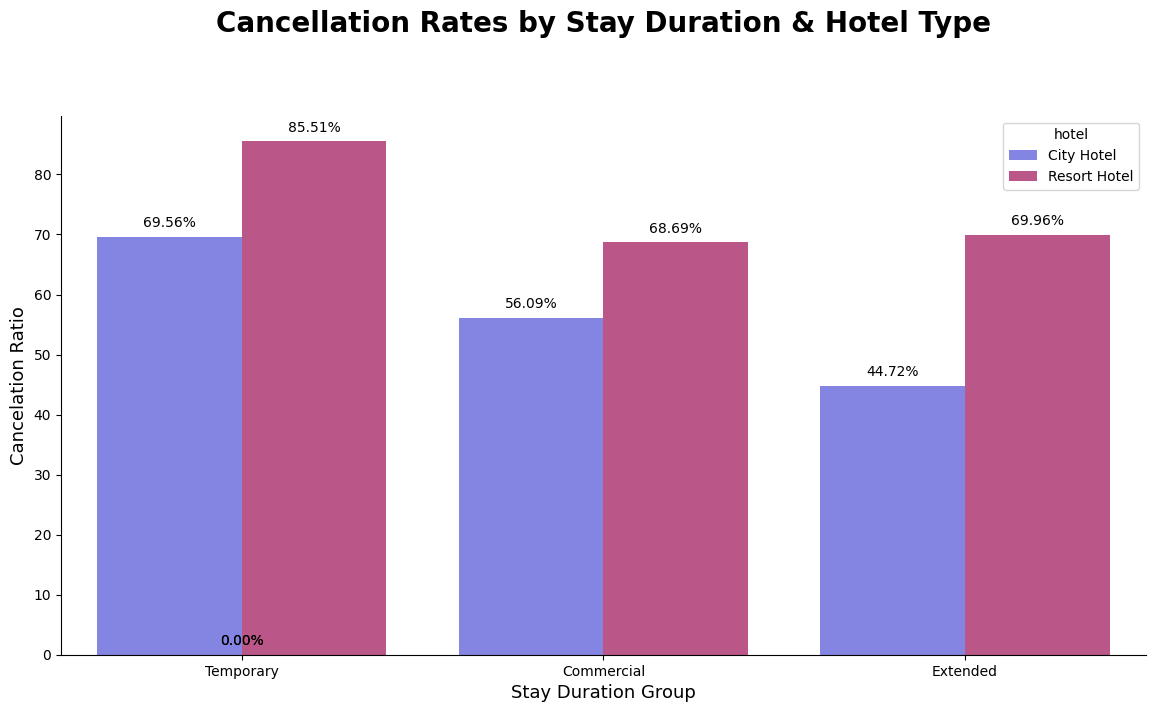

In [40]:
# Define a color palette
palettes = {"City Hotel": "#5D5DEF", "Resort Hotel": "#C22673"}


orders_cancel = ['Temporary', 'Commercial', 'Extended']

plt.figure(figsize=(14,7))
ax = sns.barplot(x='stay_duration_group', y='cancelation_ratio', hue='hotel', data=pivot_sd, palette=palettes,alpha=0.85, order=orders_cancel)
for p in ax.patches :
    ax.annotate(f"{p.get_height():.2f}%",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

sns.despine()
plt.title('Cancellation Rates by Stay Duration & Hotel Type', fontsize=20, fontweight='bold', y=1.14)
plt.xlabel('Stay Duration Group', fontsize=13)
plt.ylabel('Cancelation Ratio', fontsize=13)
plt.show()

### Task 4 Impact Analysis Of Stay Duration On Hotel Bookings Cancellation Rates

In [41]:
dfx.lead_time.value_counts().head(30)

lead_time
0     6264
1     3445
2     2065
3     1815
4     1710
5     1563
6     1444
7     1329
8     1138
12    1079
11    1054
9      991
10     974
14     964
16     941
17     879
19     837
15     836
34     828
18     826
13     821
28     820
20     750
40     722
29     712
22     707
32     690
31     683
21     678
56     676
Name: count, dtype: int64

In [42]:
leadtime_category = [
    (dfx['lead_time'] >= 361),
    (dfx['lead_time'] >= 271) & (dfx['stay_in_duration'] <= 360),
    (dfx['lead_time'] >= 181) & (dfx['stay_in_duration'] <= 270), 
    (dfx['lead_time'] >= 91) & (dfx['stay_in_duration'] <= 180), 
    (dfx['lead_time'] >= 31) & (dfx['stay_in_duration'] <= 90), 
    (dfx['lead_time'] <= 30 ) 
]
leadtime_group = ['>12 Months', '9-12 Months', '6-9 Months', '3-6 Months', '1-3 Months', '<1 Month']
dfx['lead_time_group'] = np.select(leadtime_category, leadtime_group)

In [43]:
grouped = dfx.groupby(['hotel', 'is_canceled', 'lead_time_group'])['is_canceled'].count().rename("count_booking").reset_index()

pivot_lt = grouped.pivot_table(values='count_booking', index=['hotel', 'lead_time_group'], columns='is_canceled')

pivot_lt['cancelation_ratio'] = round(pivot_lt[0] / (pivot_lt[0] + pivot_lt[1]) * 100, 2)

pivot_lt.reset_index(inplace=True)
pivot_lt = pivot_lt[['hotel', 'lead_time_group', 'cancelation_ratio']]
pivot_lt

is_canceled,hotel,lead_time_group,cancelation_ratio
0,City Hotel,1-3 Months,60.05
1,City Hotel,3-6 Months,51.97
2,City Hotel,6-9 Months,47.53
3,City Hotel,9-12 Months,23.76
4,City Hotel,<1 Month,77.70
5,City Hotel,>12 Months,27.58
6,Resort Hotel,1-3 Months,67.54
7,Resort Hotel,3-6 Months,62.56
8,Resort Hotel,6-9 Months,58.44
9,Resort Hotel,9-12 Months,57.61


C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\azary\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


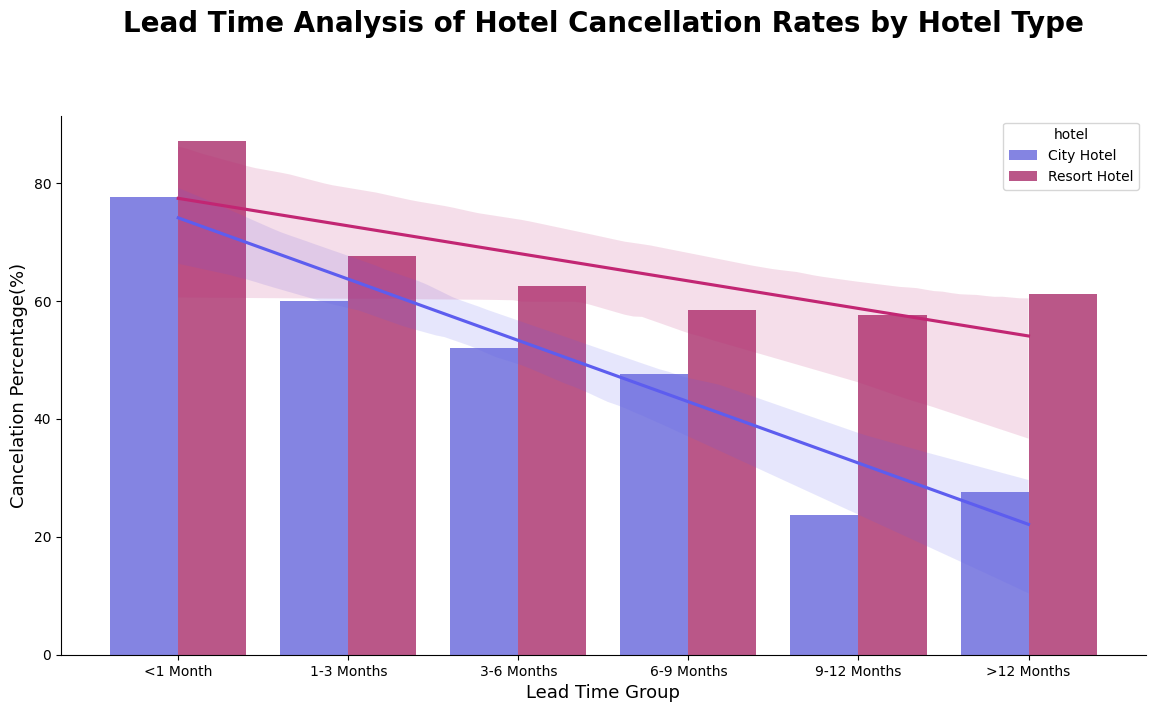

In [47]:
# Define a color palette
palettes = {"City Hotel": "#5D5DEF", "Resort Hotel": "#C22673"}

orders_cancel_lt = ['<1 Month', '1-3 Months', '3-6 Months', '6-9 Months', '9-12 Months', '>12 Months']

# Convert categorical data to numerical
pivot_lt['lead_time_group_num'] = pivot_lt['lead_time_group'].map({v: k for k, v in enumerate(orders_cancel_lt)})

plt.figure(figsize=(14,7))
ax = sns.barplot(x='lead_time_group', y='cancelation_ratio', hue='hotel', data=pivot_lt, palette=palettes, alpha=0.85, order=orders_cancel_lt)

#trend lines
for hotel, color in palettes.items():
    sns.regplot(x='lead_time_group_num', y='cancelation_ratio', data=pivot_lt[pivot_lt['hotel'] == hotel], color=color, scatter=False)

sns.despine()
plt.title('Lead Time Analysis of Hotel Cancellation Rates by Hotel Type', fontsize=20, fontweight='bold', y=1.14)
plt.xlabel('Lead Time Group', fontsize=13)
plt.ylabel('Cancelation Percentage(%)', fontsize=13)
plt.show()